# Smart Watch Analysis

There is a lot of competition among the brands in the smartwatch industry. Smartwatches are preferred by people who like to take care of their fitness. Analyzing the data collected on your fitness is one of the use cases of Data Science in healthcare.

In [41]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Reading a data
smartwatch_df=pd.read_csv('dailyActivity_merged.csv')

In [43]:
# Glances of data
smartwatch_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [44]:
#Showing the data types of columns
smartwatch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
Id                          940 non-null int64
ActivityDate                940 non-null object
TotalSteps                  940 non-null int64
TotalDistance               940 non-null float64
TrackerDistance             940 non-null float64
LoggedActivitiesDistance    940 non-null float64
VeryActiveDistance          940 non-null float64
ModeratelyActiveDistance    940 non-null float64
LightActiveDistance         940 non-null float64
SedentaryActiveDistance     940 non-null float64
VeryActiveMinutes           940 non-null int64
FairlyActiveMinutes         940 non-null int64
LightlyActiveMinutes        940 non-null int64
SedentaryMinutes            940 non-null int64
Calories                    940 non-null int64
dtypes: float64(7), int64(7), object(1)
memory usage: 110.2+ KB


The column containing the date of the record is an object. We may need to use dates in our analysis, so let’s convert this column into a datetime column:

In [45]:
# Changing the data type 
smartwatch_df['ActivityDate']=pd.to_datetime(smartwatch_df.ActivityDate,format='%m/%d/%Y')

Now, let's check if dataset have any missing values or not.

In [46]:
# Missing values computation
smartwatch_df.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

As we can see that dataset has no missing values so we are good to move further.

Look at all the columns; you will see information about very active, fairly active, lightly active, and sedentary minutes in the dataset. Let’s combine all these columns as total minutes before moving forward:

In [47]:
# Combining columns and creating a new column
smartwatch_df['Totalminutes']=smartwatch_df['VeryActiveMinutes']+smartwatch_df['FairlyActiveMinutes']+smartwatch_df['LightlyActiveMinutes']+smartwatch_df['SedentaryMinutes']

In [48]:
# Statistical summary
smartwatch_df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Totalminutes
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000


The dataset has a “Calories” column; it contains the data about the number of calories burned in a day. Let’s have a look at the relationship between calories burned and the total steps walked in a day:

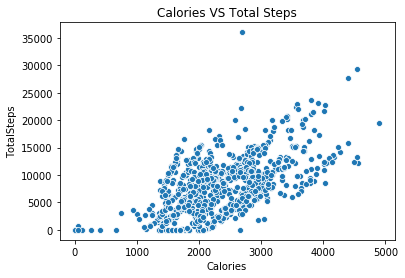

In [49]:
# Visualizeing Calories and total steps
sns.scatterplot(x='Calories',y='TotalSteps',data=smartwatch_df)
plt.title("Calories VS Total Steps")
plt.show()

By looking at the graph above we can say that calories and total steps have linear relationship.

In [50]:
# Calculating the avarage total active minutes
label=['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']
avg=smartwatch_df[['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']].mean()

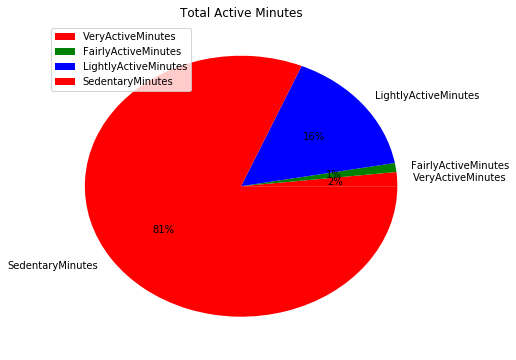

In [51]:
plt.figure(figsize=(7,6))
plt.pie(avg,labels=label, colors=['r', 'g', 'b'],autopct='%1.0f%%')
plt.legend()  
plt.title("Total Active Minutes")
plt.show()

### Observations:

1. 81.% of Total inactive minutes in a day
2. 16% of Lightly active minutes in a day
3. On an average, only 21 minutes (1%) were very active
and 2% (13 minutes) of fairly active minutes in a day

We transformed the data type of the ActivityDate column to the datetime column above. Let’s use it to find the weekdays of the records and add a new column to this dataset as “Day”:

In [52]:
# Creating a new column named 'day'
smartwatch_df['day']=smartwatch_df['ActivityDate'].dt.day_name()

In [14]:
smartwatch_df['day'].head()

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: day, dtype: object

Now let’s have a look at the very active, fairly active, and lightly active minutes on each day of the week:

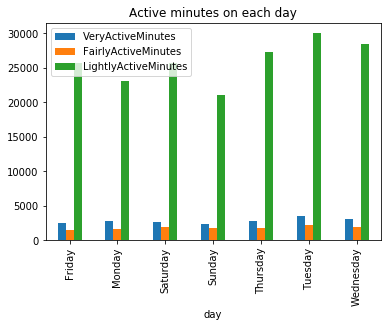

In [56]:
# visulization of active minutes on each day
smartwatch_df.groupby(['day'])['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes'].sum().plot(kind='bar')
plt.title("Active minutes on each day")
plt.show()

By looking at the graph above we can obsarve that tuesday is the most active day.

Now let’s have a look at the number of inactive minutes on each day of the week:

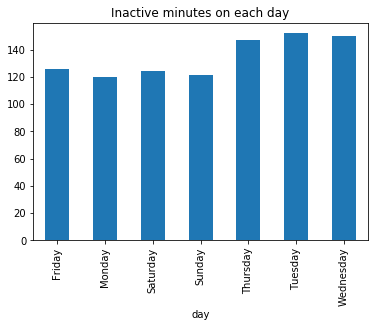

In [55]:
# visulization of inactive minutes on each day
smartwatch_df.groupby(['day'])['SedentaryMinutes'].count().plot(kind='bar')
plt.title('Inactive minutes on each day')
plt.show()

So by visualizing the above graph we can say thursday is the most inactive day according to the lifestyle of all the individuals in the dataset. Now let’s have a look at the number of calories burned on each day of the week:

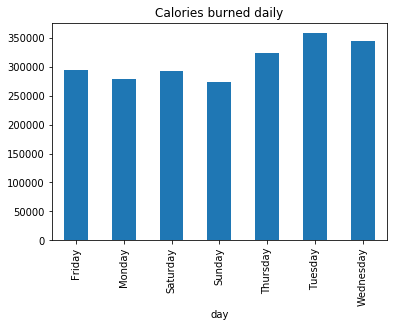

In [59]:
# Visualizing the calories burned daily 
smartwatch_df.groupby(['day'])['Calories'].sum().plot(kind='bar')
plt.title('Calories burned daily')
plt.show()

Tuesday is, therefore, one of the most active days for all individuals in the dataset, as the highest number of calories were burned on Tuesdays.
